## 💾 The data

The company has stored the machine operating data in a single table, available in `'data/machine_downtime.csv'`.

#### Each row in the table represents the operational data for a single machine on a given day:
- `"Date"` - the date the reading was taken on.
- `"Machine_ID"` - the unique identifier of the machine being read.
- `"Assembly_Line_No"` - the unique identifier of the assembly line the machine is located on.
- `"Hydraulic_Pressure(bar)"`, `"Coolant_Pressure(bar)"`, and `"Air_System_Pressure(bar)"` - pressure measurements at different points in the machine.
- `"Coolant_Temperature"`, `"Hydraulic_Oil_Temperature"`, and `"Spindle_Bearing_Temperature"` - temperature measurements (in Celsius) at different points in the machine.
- `"Spindle_Vibration"`, `"Tool_Vibration"`, and `"Spindle_Speed(RPM)"` - vibration (measured in micrometers) and rotational speed measurements for the spindle and tool.
- `"Voltage(volts)"` - the voltage supplied to the machine.
- `"Torque(Nm)"` - the torque being generated by the machine.
- `"Cutting(KN)"` - the cutting force of the tool.
- `"Downtime"` - an indicator of whether the machine was down or not on the given day.

## 💪 challenge

Create a report that covers the following:
1. What is the first and last date readings were taken on?
2. What is the average Torque?
3. Which assembly line has the highest readings of machine downtime?

# **Title: Understanding Machine Performance Through Correlation Analysis** # 

### **Executive Summary** ###
This analysis explores key relationships between operational parameters in the machine systems of a manufacturing process. Using a correlation heatmap, we uncover critical insights that can guide efforts to optimize system performance and reduce downtime. Key findings include a moderate correlation between Spindle Speed (RPM) and Cutting Force (kN), and an inverse relationship between Hydraulic Pressure and Cutting Force. Additionally, we provide actionable recommendations to improve machine efficiency through adaptive control systems, hydraulic pressure optimization, and modular maintenance strategies.

# **Introduction** # 
In high-precision manufacturing, particularly in industries such as aerospace and automotive, understanding the interaction of machine parameters is crucial for minimizing downtime and improving production efficiency. This report investigates machine performance using operational data and provides insights into the relationships between key parameters to inform predictive maintenance strategies.





In [3]:
import pandas as pd
import numpy as np

# Load the data
downtime = pd.read_csv('data/machine_downtime.csv')
downtime.head()

# What is the first and last date readings were taken on?
first_date = downtime['Date'].min()
last_date = downtime['Date'].max()

print(first_date)
print(last_date)

avg_torque = np.mean(downtime["Torque(Nm)"])
print(avg_torque)

Highest_downtime = downtime.groupby("Assembly_Line_No")["Downtime"].count()
print(Highest_downtime)

01-02-2022
31-12-2021
25.234967730137154
Assembly_Line_No
Shopfloor-L1    874
Shopfloor-L2    808
Shopfloor-L3    818
Name: Downtime, dtype: int64


# **Data Overview**
The dataset spans from 31st December 2021 to 1st February 2022 and contains readings from several machine parameters, including spindle speed, cutting force, pressure, and temperature. This analysis utilizes correlation to understand how these parameters relate to each other and to downtime events.

# **Answers to Challenge** #
- 1.  `"What is the first and last date readings were taken on?"`

**First Date:** The first reading was taken on  `"**31st December 2021.**"`

**Last Date:** The last reading in the dataset is   `"**1st February 2022.**"`

- 2.  `"**What is the average Torque?**"`

The average Torque recorded across all machines is  `"**25.23 Nm.**"` This value serves as a benchmark for evaluating operational consistency and identifying anomalies in torque behavior.

- 3.  `"**Which assembly line has the highest readings of machine downtime?**"`

 `"**Shopfloor-L1 **"` recorded the highest number of downtime events, with a total of  `"**874 downtime**"` events. This assembly line should be prioritized for maintenance to reduce production disruptions.


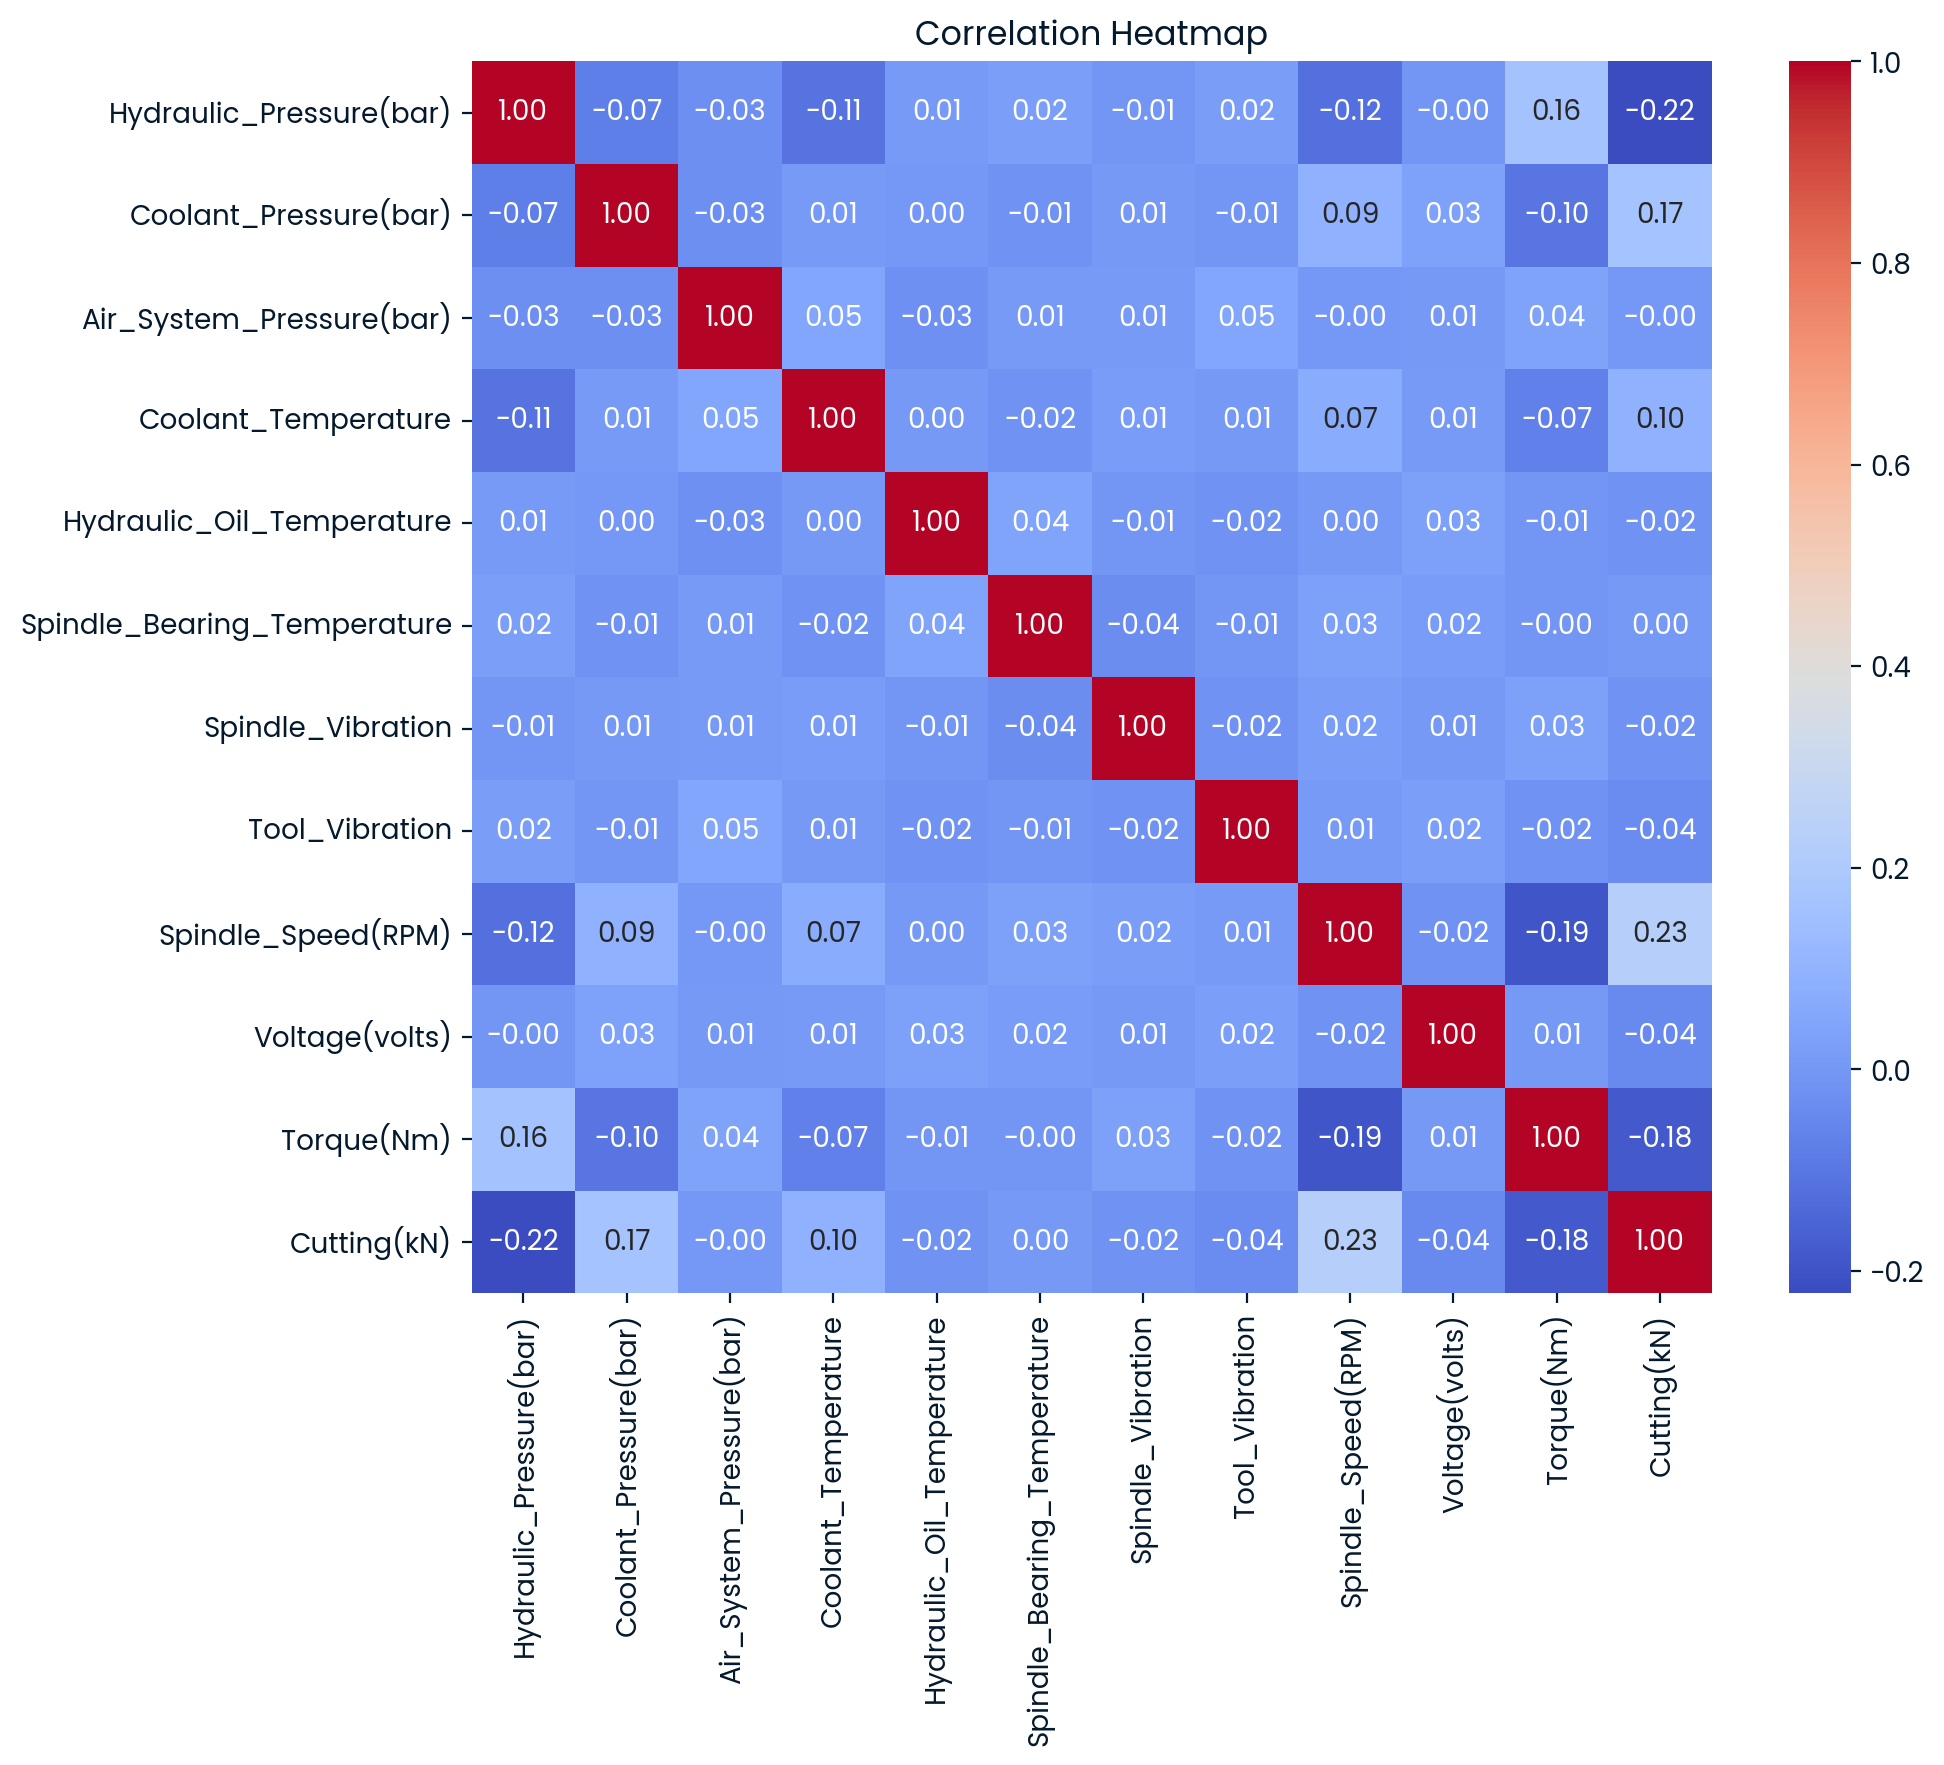

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Update the path to your actual CSV file
csv_file_path = 'data/machine_downtime.csv'

try:
    downtime = pd.read_csv(csv_file_path)  # Load your DataFrame
except FileNotFoundError:
    print(f"Error: The file at path '{csv_file_path}' was not found.")
    import sys
    sys.exit(1)

# Convert date columns to datetime
for col in downtime.columns:
    if downtime[col].dtype == 'object':
        try:
            downtime[col] = pd.to_datetime(downtime[col])
        except ValueError:
            pass

# Select only numeric columns for correlation calculation
numeric_downtime = downtime.select_dtypes(include='number')

# Calculate correlations
corr = numeric_downtime.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **Key Findings from the Correlation Analysis**# 

"1. Spindle Speed and Cutting Force"

- `"**Correlation:**"` - A moderate positive correlation of  `"0.23"` exists between Spindle Speed (RPM) and Cutting Force (kN).

- `"**Insight:**"` - The relationship between spindle speed and cutting force is clear, though moderate, indicating other factors are also at play. An adaptive control system could optimize cutting performance by adjusting spindle speed based on cutting force.

"2. Hydraulic Pressure and Cutting Force"

- `"**Correlation:**"` - A negative correlation of `"-0.22"` between Hydraulic Pressure and Cutting Force.

- `"**Insight:**"` - This suggests an inverse relationship, possibly driven by an automated system that adjusts hydraulic pressure to maintain optimal cutting conditions when force increases.

"3. Thermal Management Systems"

- `"**Correlation:**"` - Weak correlations were found between Coolant Temperature, Hydraulic Oil Temperature, and Spindle Bearing Temperature.

- `"**Insight:**"` - These weak correlations indicate effective thermal isolation, ensuring that different systems function independently without affecting each other, suggesting a well-designed thermal management system.

"4. Vibration and System Dynamics"

- `"**Correlation:**"` - Vibration parameters (spindle vibration and tool vibration) show very weak correlations with other operational variables.

- `"**Insight:**"` - This independence indicates a robust mechanical design. Vibration monitoring can be treated as an independent factor for predictive maintenance.

"5. Torque and Cutting Force"

- `"**Correlation:**"` - A weak negative correlation of **-0.18** between Torque and Cutting Force suggests that the system might adjust torque to maintain consistent cutting performance.

- `"**Insight:**"` - Adaptive control could improve cutting precision by maintaining consistent torque and cutting force relationships.

"6. Pressure Systems"

- `"**Correlation:**"` - Weak correlations exist between Air System Pressure, Coolant Pressure, and Hydraulic Pressure.

- `"**Insight:**"` - The independence of these systems suggests that pressure subsystems are well-isolated, ensuring reliability but leaving room for optimization through more integrated control systems.

# **Actionable Recommendations** #

- `"**Implement Adaptive Control Systems:**"`

Based on the positive correlation between Spindle Speed and Cutting Force, it is recommended to implement an adaptive control system that dynamically adjusts spindle speed to optimize cutting force and improve efficiency.

- `"**Refine Hydraulic Pressure Control:**"`

The negative correlation between Hydraulic Pressure and Cutting Force suggests that fine-tuning hydraulic pressure could improve the balance between cutting force and system stability, enhancing tool life and reducing wear.

-  `"**Modular Maintenance Approach:**"`

Given the weak correlations between most subsystems (temperature, pressure, and vibration), a modular maintenance approach should be adopted, where each system is monitored and maintained based on its unique parameters rather than relying on a generalized maintenance schedule.
Long-Term Monitoring with Machine Learning:

The weak but significant correlations suggest potential benefits from a machine learning model that could track shifts in these relationships over time and predict machine degradation. A real-time monitoring system could provide early warnings of impending failures, allowing for more proactive maintenance.

# **Conclusion**

While many of the correlations in this dataset are weak, the few stronger relationships offer valuable insights for improving system performance. Specifically, the findings point toward opportunities for adaptive control systems, refined hydraulic pressure management, and modular maintenance approaches. These measures can help reduce downtime and improve operational efficiency, particularly for Shopfloor-L1, which experienced the highest downtime.

Moving forward, implementing a combination of real-time monitoring, predictive maintenance strategies, and machine learning algorithms can further enhance system reliability and minimize production disruptions.




## Acknowledgment ## 

I would like to express my gratitude for the opportunity to analyze this valuable dataset and contribute to the optimization of manufacturing systems. By uncovering these insights, I hope to assist in reducing machine downtime and improving operational efficiency, ultimately supporting the mission of delivering high-quality products to end users.

This report was prepared and executed by **Adewole Oyediran,**  with a commitment to clarity, actionable insights, and fostering innovation in industrial machine management. I welcome any feedback or questions to further refine the analysis.

Thank you for your consideration.

`"**Project executed by: 
Adewole Oyediran,
Bensha2019@outlook.com"`
